In [77]:
import pandas as pd
import numpy as np

# to work with json files and flatten them
import json

# for conversion to datetime
import datetime

# visualization
import plotly
import chart_studio.plotly as py
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
# to have plotly working in my notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# to make everything work locally
cf.go_offline()
# to show everything on notebook
%matplotlib inline

In [2]:
# fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
# channelGrouping - The channel via which the user came to the Store.
# date - The date on which the user visited the Store.
# device - The specifications for the device used to access the Store.
# geoNetwork - This section contains information about the geography of the user.
# socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
# totals - This section contains aggregate values across the session.
# trafficSource - This section contains information about the Traffic Source from which the session originated.
# visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
# visitNumber - The session number for this user. If this is the first session, then this is set to 1.
# visitStartTime - The timestamp .
# hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
# customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.
# totals - This set of columns mostly includes high-level aggregate data.

In [3]:
df = pd.read_csv(r"train.csv")

C:\Users\Davide Della Valle\anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [5]:
# the fullVisitorId is a unique identifier for each user of the Google Merchandise Store
# As shown below there are visitors visiting more than once, ant the number if unique visitors
# ???? check relationship with purchase

df.fullVisitorId.value_counts()[:100]

1957458976293878100    205
824839726118485274     205
1856749147915772585    151
3608475193341679870    149
7634897085866546110    131
                      ... 
8197879643797712877     32
7056765414153975134     32
4309363468347582056     32
6651087220529552909     31
4835082938415020542     31
Name: fullVisitorId, Length: 100, dtype: int64

In [233]:
print("Number of unique visitors in df: ",df.fullVisitorId.nunique(), " out of rows : ",df.shape[0])

Number of unique visitors in df:  742735  out of rows :  903653


In [6]:
# SPECIFIC CUSTOMER BEHAVIOUR
# the visitor ID 1957458976293878100 appears in the DF 205 times as reported from the previous value_counts. 
# It seems anyway that the same user has visited the Gstore 326 times as reported in visitNumber. The missing data might be in the test dataset or just not included in this samples.
df[df.fullVisitorId == "1957458976293878100"].sort_values(by=["visitNumber"])

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
478864,Organic Search,20160810,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470858691,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""20"", ""pageviews"": ""14""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470858691,42,1470858691
478176,Organic Search,20160810,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470863775,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470863775,43,1470863775
478367,Organic Search,20160810,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470866550,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""6"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470866550,44,1470866550
11357,Organic Search,20160811,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470931824,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""26"", ""pageviews"": ""18""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470931824,45,1470931824
11005,Organic Search,20160811,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1470934753,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1470934753,46,1470934753
...,...,...,...,...,...,...,...,...,...,...,...,...
6602,Display,20170623,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1498248064,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11""}","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1498248064,309,1498248064
41081,Display,20170630,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1498830593,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""42"", ""pageviews"": ""30...","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1498830593,315,1498830593
466127,Display,20170711,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1499803210,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""2"", ""pageviews"": ""2""}","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1499803210,320,1499803210
64846,Display,20170801,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",1957458976293878100,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1957458976293878100_1501599019,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""3"", ""pageviews"": ""3""}","{""campaign"": ""(not set)"", ""source"": ""dfa"", ""me...",1501599019,325,1501599019


In [7]:
df.visitNumber.value_counts()

1      703060
2       92548
3       35843
4       19157
5       11615
        ...  
306         1
349         1
350         1
351         1
395         1
Name: visitNumber, Length: 384, dtype: int64

In [8]:
#list(df.totals.unique())

In [9]:
df.shape

(903653, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [12]:
df.isnull().sum()

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

In [8]:
df1 = pd.read_csv(r"test.csv")

C:\Users\Davide Della Valle\anacondanew\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
df1.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6167871330617112363,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",6167871330617112363_1508151024,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""4"", ""pageviews"": ""4""}","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508151024,2,1508151024
1,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",0643697640977915618,"{""continent"": ""Europe"", ""subContinent"": ""South...",0643697640977915618_1508175522,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""5"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508175522,1,1508175522
2,Organic Search,20171016,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6059383810968229466,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",6059383810968229466_1508143220,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""7"", ""pageviews"": ""7"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508143220,1,1508143220
3,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2376720078563423631,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2376720078563423631_1508193530,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""8"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508193530,1,1508193530
4,Organic Search,20171016,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",2314544520795440038,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",2314544520795440038_1508217442,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""9"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1508217442,1,1508217442


In [10]:
df1.shape

(804684, 12)

In [11]:
df1.isnull().sum()

channelGrouping         0
date                    0
device                  0
fullVisitorId           0
geoNetwork              0
sessionId               0
socialEngagementType    0
totals                  0
trafficSource           0
visitId                 0
visitNumber             0
visitStartTime          0
dtype: int64

In [188]:
# the dataset is too heavy therefore I have decided to reduce the amount of rows to 50,000, it will be around 80 MB and will be possible for uploading on github as well
# I am reshuffling the rows as well to make sure that different samples are present in the new DF
# ????? column totals contains data on revenue, in my sample just 1000 records out of 50000 are showing revenue. 
# Note: I have resampled the DF and now the records with revenue are less than 700, How should I deal with it? Teh question is should I have a defined number of revenue records? like 10% ore less? The scope of the dataset is to the predict transactions for the period December 1st 2018 through January 31st 2019....Prophet(time series)?
# the actual project wants to make prediction of the visitors included in the column fullVisitorId listed in sample_submission_v2.csv.

new = df.sample(frac = 1).head(60000)
new.reset_index(drop=True,inplace=True)
new.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20161127,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",5722542924442090037,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",5722542924442090037_1480282222,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1480282222,3,1480282222
1,Organic Search,20170528,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9178956148353056355,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",9178956148353056355_1495985116,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1495985116,1,1495985116
2,Organic Search,20170208,"{""browser"": ""Internet Explorer"", ""browserVersi...",7151168001217008183,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",7151168001217008183_1486562919,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1486562919,1,1486562919
3,Organic Search,20170128,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",936829109518561017,"{""continent"": ""Europe"", ""subContinent"": ""Weste...",936829109518561017_1485603194,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""11"", ""pageviews"": ""11...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1485603194,1,1485603194
4,Referral,20170220,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",6231367698628537108,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",6231367698628537108_1487651117,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""referralPath"": ""/"", ""campaign"": ""(not set)"",...",1487651117,4,1487651117


In [189]:
new.shape

(60000, 12)

In [190]:
# have a quick look at the different json columns and what they enclose

new.device[0]

'{"browser": "Safari", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "iOS", "operatingSystemVersion": "not available in demo dataset", "isMobile": true, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "tablet"}'

In [191]:
new.geoNetwork[0]

'{"continent": "Americas", "subContinent": "Northern America", "country": "United States", "region": "not available in demo dataset", "metro": "not available in demo dataset", "city": "not available in demo dataset", "cityId": "not available in demo dataset", "networkDomain": "(not set)", "latitude": "not available in demo dataset", "longitude": "not available in demo dataset", "networkLocation": "not available in demo dataset"}'

In [192]:
new.totals[6]

'{"visits": "1", "hits": "4", "pageviews": "4", "newVisits": "1"}'

In [193]:
new.trafficSource[0]

'{"campaign": "(not set)", "source": "google", "medium": "organic", "keyword": "(not provided)", "adwordsClickInfo": {"criteriaParameters": "not available in demo dataset"}, "isTrueDirect": true}'

In [194]:
new.date[0]

20161127

In [195]:
# convert integer to datetime

new.date = pd.to_datetime(new.date,format="%Y%m%d")

In [196]:
new.to_csv(r"new.csv")

In [44]:
# 1 QUESTION: how to write this code??
# 
# 
# def load_df(csv_path):
#     JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
#     df = pd.read_csv(csv_path, 
#                      converters={column: json.loads for column in JSON_COLUMNS}, 
#                      dtype={'fullVisitorId': 'str'}
#                      )
    
#     for column in JSON_COLUMNS:
#         column_as_df = json_normalize(df[column])
#         column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
#         df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
#     print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
#     return df

In [45]:
# there are several columns in form of json files, dictionaries which I will need to convert to create one final DF

new.device

0        {"browser": "Safari", "browserVersion": "not a...
1        {"browser": "Safari", "browserVersion": "not a...
2        {"browser": "Chrome", "browserVersion": "not a...
3        {"browser": "Chrome", "browserVersion": "not a...
4        {"browser": "Chrome", "browserVersion": "not a...
                               ...                        
49995    {"browser": "Chrome", "browserVersion": "not a...
49996    {"browser": "Chrome", "browserVersion": "not a...
49997    {"browser": "Chrome", "browserVersion": "not a...
49998    {"browser": "Chrome", "browserVersion": "not a...
49999    {"browser": "Chrome", "browserVersion": "not a...
Name: device, Length: 50000, dtype: object

In [46]:
# creating new df with just the device column to check if lambda function with json.loads works correctly
device = new.device

In [47]:
# it works

device = device.apply(lambda x: pd.Series(json.loads(x)))
device.head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,tablet
1,Safari,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
4,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop


In [48]:
device.shape

(50000, 16)

In [197]:
# apply json.loads to all columns with json files to extract them and create new DFs for further exploration

device = new.device.apply(lambda x: pd.Series(json.loads(x)))
geoNetwork = new.geoNetwork.apply(lambda x: pd.Series(json.loads(x)))
totals = new.totals.apply(lambda x: pd.Series(json.loads(x)))
trafficSource = new.trafficSource.apply(lambda x: pd.Series(json.loads(x)))

In [198]:
# analyse all new DFs to drop columns with several missing data or columns that are not relevant for my research.
# eg: geoNetwork has 11 columns, when running sum of null values, it appears to be complete but actually all missing values are reported as "not available in demo dataset", a deeper exploration is needed on more features and keywords

geoNetwork

,continent,subContinent,country,region,metro,city,cityId,networkDomain,latitude,longitude,networkLocation
0,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset
3,Europe,Western Europe,Netherlands,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,atom86.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,peppermillcas.com,not available in demo dataset,not available in demo dataset,not available in demo dataset
...,...,...,...,...,...,...,...,...,...,...,...
59995,Asia,Eastern Asia,Taiwan,Taipei City,(not set),(not set),not available in demo dataset,hinet.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
59996,Europe,Northern Europe,Finland,(not set),(not set),Helsinki,not available in demo dataset,dnainternet.fi,not available in demo dataset,not available in demo dataset,not available in demo dataset
59997,Americas,Northern America,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,embarqhsd.net,not available in demo dataset,not available in demo dataset,not available in demo dataset
59998,Americas,Northern America,Canada,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,teksavvy.com,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [199]:
geoNetwork.isnull().sum()

continent          0
subContinent       0
country            0
region             0
metro              0
city               0
cityId             0
networkDomain      0
latitude           0
longitude          0
networkLocation    0
dtype: int64

In [200]:
# I will start dropping those columns where all data are missing. I will keep just country as several other columns are giving almost the same information. I would have liked to keep city as well for a more microresearch on the origin of buyers and visitors but more than 50% of this info is missing
# # I will need to further analyse networkDomain since almost 50% of the info seems to be missing

geoNetwork[geoNetwork == "not available in demo dataset"].count()

continent              0
subContinent           0
country                0
region             33519
metro              33519
city               33519
cityId             60000
networkDomain          0
latitude           60000
longitude          60000
networkLocation    60000
dtype: int64

In [201]:
geoNetwork[geoNetwork =="(not set)"].count()

continent            102
subContinent         102
country              102
region              2017
metro              13619
city                2336
cityId                 0
networkDomain      16097
latitude               0
longitude              0
networkLocation        0
dtype: int64

In [202]:
# I will keep this column for the time being

geoNetwork.networkDomain.value_counts()

(not set)                16097
unknown.unknown           9870
comcast.net               1875
rr.com                     973
ttnet.com.tr               878
                         ...  
northshorelij.com            1
norfolk.sch.uk               1
oxid.cz                      1
automatichandling.com        1
firstlight.net               1
Name: networkDomain, Length: 5483, dtype: int64

In [203]:
geoNetwork.drop(columns=["continent","subContinent","region","metro","city","cityId","latitude","longitude","networkLocation"], inplace=True)

In [204]:
geoNetwork

,country,networkDomain
0,United States,(not set)
1,United States,(not set)
2,United States,(not set)
3,Netherlands,atom86.net
4,United States,peppermillcas.com
...,...,...
59995,Taiwan,hinet.net
59996,Finland,dnainternet.fi
59997,United States,embarqhsd.net
59998,Canada,teksavvy.com


In [205]:
# country = geoNetwork.country.value_counts().to_frame
# country

In [206]:
# geonetwork.country.value_counts.....display top 10 country and group rest under others
# normalize=True for percentage but here full number are fine
country = geoNetwork.country.value_counts()[:15]
country["others"]= geoNetwork.country.value_counts()[15:].sum()
country = pd.DataFrame(country).reset_index()
country.columns = ["country","count"]
country

,country,count
0,United States,24208
1,India,3345
2,United Kingdom,2504
3,Canada,1656
4,Vietnam,1652
5,Turkey,1345
6,Germany,1338
7,Thailand,1325
8,Japan,1293
9,Brazil,1284


In [207]:
px.pie(country, values="count", names="country", title="Origin of GStore visitors", color_discrete_sequence=px.colors.sequential.Plasma)


In [53]:
# ??? list(geoNetwork.networkDomain.unique()) # list of website where users came from????

In [ ]:
# Now the exploration will be run on DEVICE

In [215]:
device.dtypes

browser            object
operatingSystem    object
isMobile             bool
deviceCategory     object
dtype: object

In [216]:
# No null data, check on "not available in demo dataset"
device.isnull().sum()

browser            0
operatingSystem    0
isMobile           0
deviceCategory     0
dtype: int64

In [208]:
device[device == "not available in demo dataset"].count()

browser                          0
browserVersion               60000
browserSize                  60000
operatingSystem                  0
operatingSystemVersion       60000
isMobile                         0
mobileDeviceBranding         60000
mobileDeviceModel            60000
mobileInputSelector          60000
mobileDeviceInfo             60000
mobileDeviceMarketingName    60000
flashVersion                 60000
language                     60000
screenColors                 60000
screenResolution             60000
deviceCategory                   0
dtype: int64

In [212]:
device.drop(columns=["browserVersion","browserSize","operatingSystemVersion","mobileDeviceBranding","mobileDeviceModel","mobileInputSelector","mobileDeviceInfo","mobileDeviceMarketingName","flashVersion", "language","screenColors","screenResolution"], inplace=True)

In [331]:
device["for_counting"] = 1

In [332]:
device.head()

,browser,operatingSystem,isMobile,deviceCategory,for_counting
0,Safari,iOS,True,tablet,1
1,Chrome,Windows,False,desktop,1
2,Internet Explorer,Windows,True,mobile,1
3,Firefox,Windows,False,desktop,1
4,Chrome,Macintosh,False,desktop,1


In [343]:
test = device.groupby(["deviceCategory", "browser"], as_index=False).sum().sort_values(by="for_counting",ascending=False)[:20]
test

,deviceCategory,browser,isMobile,for_counting
2,desktop,Chrome,6,33211
26,mobile,Chrome,7444,7455
18,desktop,Safari,4,6083
36,mobile,Safari,4830,4832
5,desktop,Firefox,0,2352
6,desktop,Internet Explorer,1,1161
48,tablet,Safari,1137,1138
43,tablet,Chrome,676,676
4,desktop,Edge,0,627
24,mobile,Android Webview,436,436


<AxesSubplot:xlabel='deviceCategory', ylabel='for_counting'>

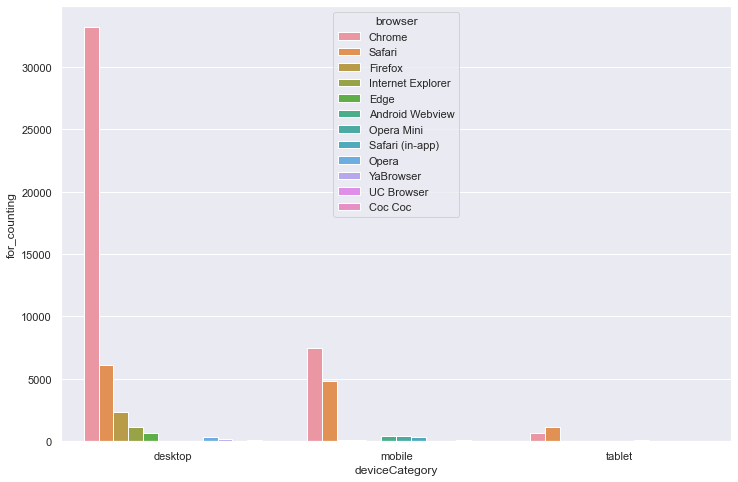

In [344]:
sns.barplot(data=test, x="deviceCategory", y="for_counting", hue="browser")

In [214]:
device.deviceCategory.value_counts()

desktop    44125
mobile     13888
tablet      1987
Name: deviceCategory, dtype: int64

In [319]:
#px.bar(device, x="deviceCategory",color_discrete_sequence=px.colors.sequential.Plasma)

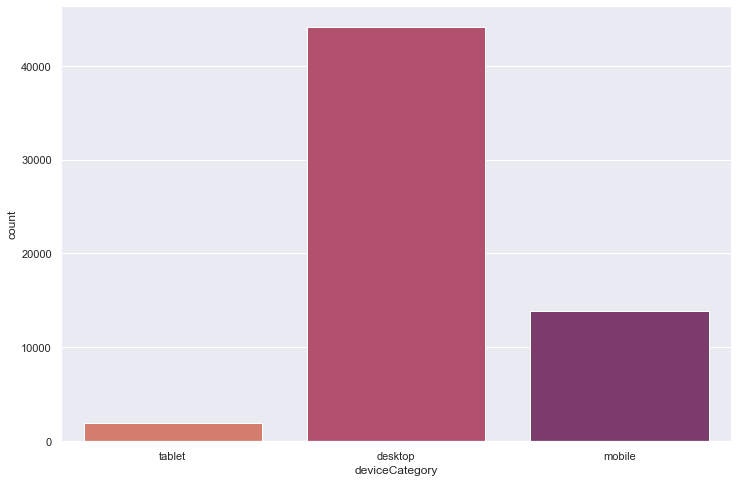

In [283]:
# ??????percentage on top?????
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="deviceCategory", data=device,palette= "flare")

In [ ]:
# pie chart desktop and mobile 

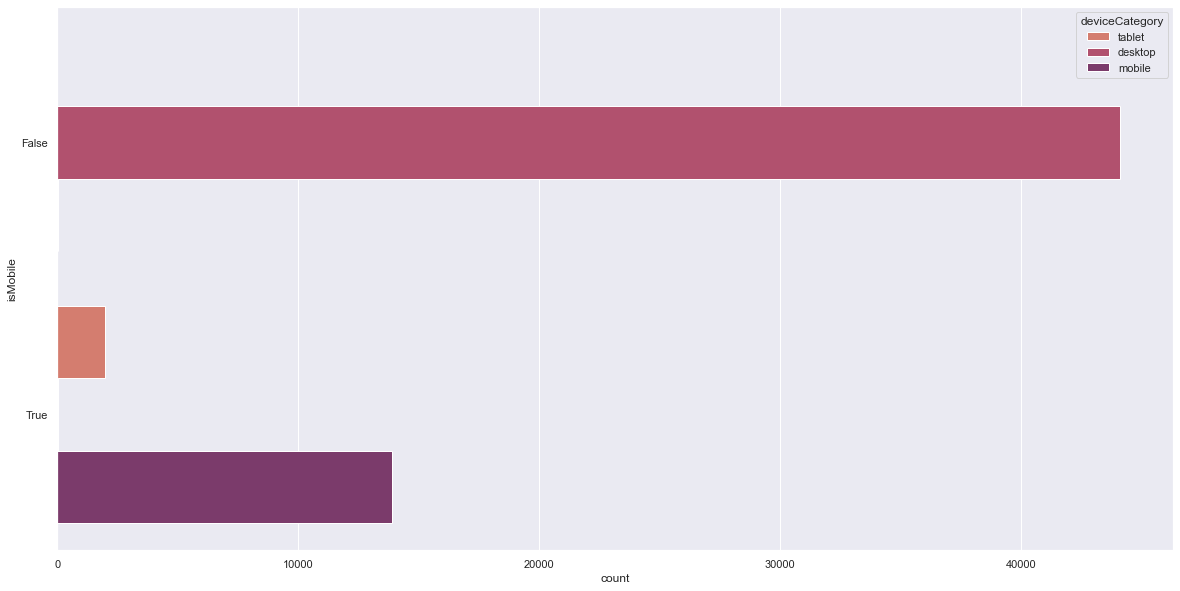

In [289]:
# not telling much
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(y="isMobile", data=device, hue="deviceCategory",palette="flare")

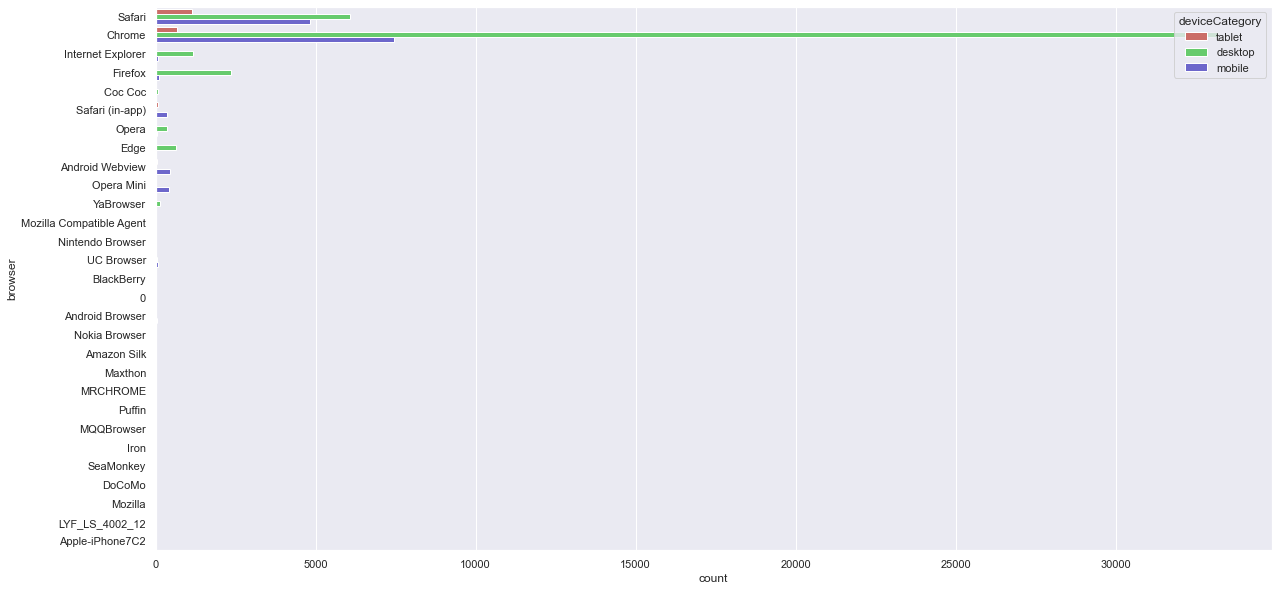

In [325]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.countplot(y="browser", data=device, hue="deviceCategory",palette="hls")

In [282]:
most_used_browser = device.groupby("browser")["isMobile"].count().sort_values(ascending=False).reset_index()
most_used_browser.columns=["browser","count"]

<AxesSubplot:xlabel='count', ylabel='browser'>

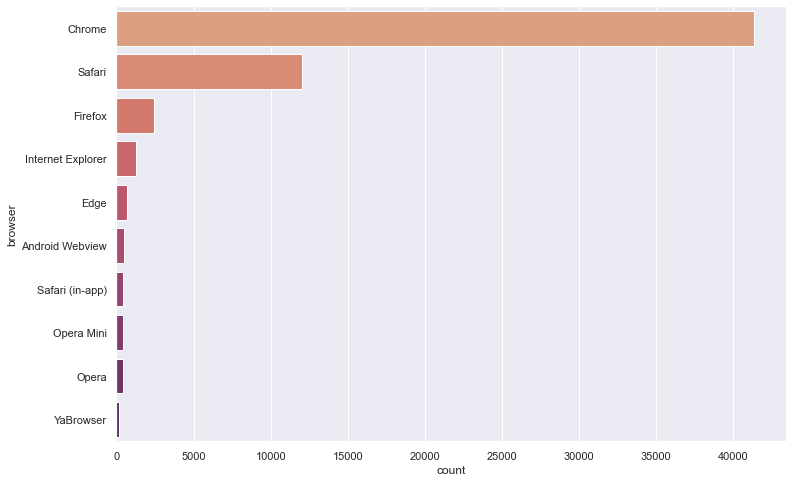

In [281]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(y="browser",x="count", data=most_used_browser[:10],palette="flare")

In [285]:
OS = device.groupby("operatingSystem")["isMobile"].count().sort_values(ascending=False).reset_index()
OS.columns=["os","count"]
OS

,os,count
0,Windows,23531
1,Macintosh,16687
2,Android,8158
3,iOS,7184
4,Linux,2253
5,Chrome OS,1726
6,(not set),320
7,Windows Phone,70
8,Samsung,25
9,BlackBerry,19


<AxesSubplot:xlabel='count', ylabel='os'>

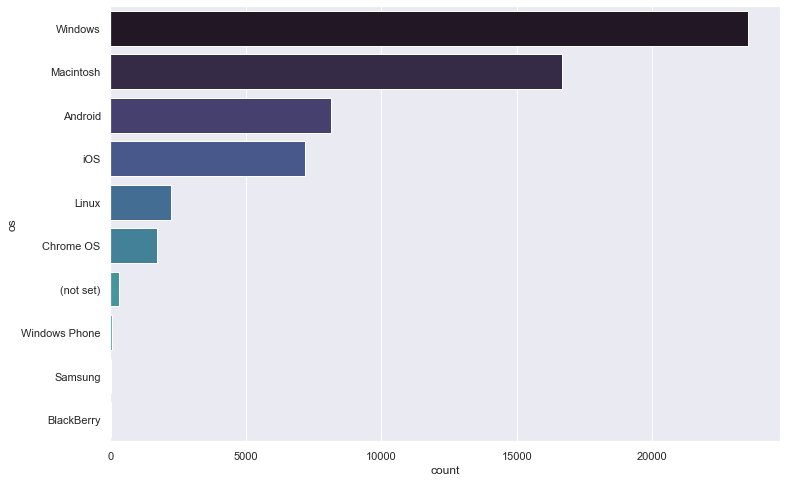

In [286]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(y="os",x="count", data=OS[:10],palette="mako")

In [279]:
# start presentation with these.
# categorical data visualizations - Barplot (hue), pieplot, ?countplot?

In [298]:
# should I keep bounces? probably modifying Nan to 0? or yes and no
# !!!!!main no drop transactionRevenue!!! just 1000 out of 50000, is that the conversion rate?
# relation on newvisits and transactionRevenue
# hits to categorical - boxplot, barplot, scatterplot
# bounces ?? people leaving teh website?
# histogram TR as category yes or no with all others

totals

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,0,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,11,11,0,1,NaN
4,1,1,1,1,0,NaN
...,...,...,...,...,...,...
59995,1,5,5,0,1,NaN
59996,1,1,1,1,1,NaN
59997,1,2,2,0,1,NaN
59998,1,2,2,0,1,NaN


In [348]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   visits              60000 non-null  int64   
 1   hits                60000 non-null  int64   
 2   pageviews           60000 non-null  object  
 3   bounces             60000 non-null  category
 4   newVisits           60000 non-null  int64   
 5   transactionRevenue  758 non-null    float64 
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 2.3+ MB


In [295]:
totals.bounces.fillna(0,inplace=True)
totals.newVisits.fillna(0,inplace=True)

In [296]:
totals.pageviews.value_counts()

1      29961
2       9707
3       4980
4       2982
5       2252
       ...  
76         1
327        1
87         1
191        1
151        1
Name: pageviews, Length: 110, dtype: int64

In [302]:
# pageviews has 8 Nan values which I am going to fill with 1 (the mode)
totals[totals.pageviews.isnull()]

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
3816,1,2,NaN,0,0,NaN
8961,1,1,NaN,0,0,NaN
12814,1,1,NaN,0,0,NaN
15736,1,1,NaN,0,0,NaN
26018,1,1,NaN,0,0,NaN
34099,1,1,NaN,0,1,NaN
36971,1,3,NaN,0,1,NaN
38886,1,1,NaN,0,0,NaN


In [347]:
totals.pageviews.fillna(1,inplace=True)

In [299]:
totals.transactionRevenue = totals.transactionRevenue.astype("float")
totals.visits = totals.visits.astype("int64")
totals.hits = totals.hits.astype("int64")
# totals.pageviews = totals.pageviews.astype("int64")
totals.newVisits = totals.newVisits.astype("int64")
totals.bounces = totals.bounces.astype("category")

In [104]:
# 1 - 2 to 4 - 5 to 10 - rest
totals.hits.value_counts()

1      24807
2       7646
3       3899
4       2343
5       1717
       ...  
278        1
110        1
142        1
220        1
159        1
Name: hits, Length: 140, dtype: int64

In [88]:
totals.visits.fillna(value="0", inplace=True)
totals.newVisits.fillna(value="0", inplace=True)

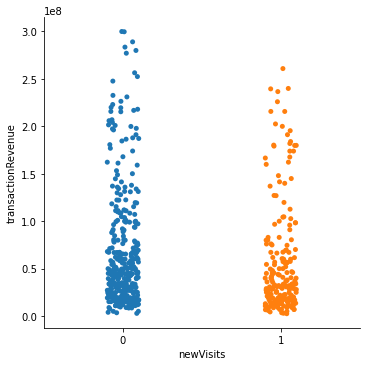

In [93]:
# +++ query the data to get specific types of data, (eg. "country=="United States""") +++
sns.catplot(x="newVisits", y="transactionRevenue", data=totals.query("transactionRevenue  < 300000000"))

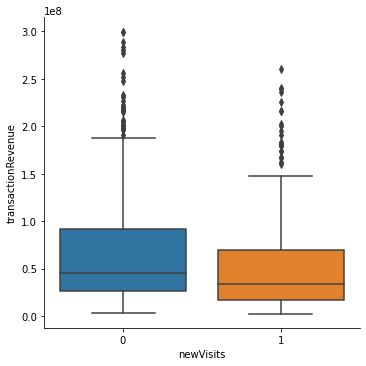

In [94]:
sns.catplot(x="newVisits", y="transactionRevenue", data=totals.query("transactionRevenue  < 300000000"),kind="box")

In [64]:
totals.bounces = totals.bounces.astype(float)

In [65]:
totals.dtypes

visits                 object
hits                   object
pageviews              object
newVisits              object
bounces               float64
transactionRevenue     object
dtype: object

In [66]:
totals.isnull().sum()

visits                    0
hits                      0
pageviews                10
newVisits             11267
bounces               24992
transactionRevenue    49380
dtype: int64

<AxesSubplot:>

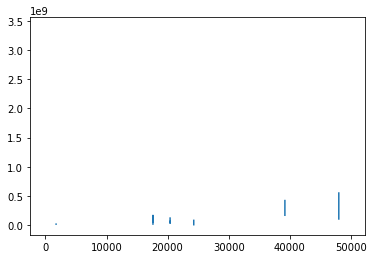

In [86]:
totals.transactionRevenue.astype("float").plot()

In [70]:
# ??? isTrueDirect either NaN or True, should I fill in  NAn with False
# drop adContent + adwordsClickInfo
# keyword useful??
# 

trafficSource

,campaign,source,medium,keyword,adwordsClickInfo,referralPath,isTrueDirect,adContent
0,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN
1,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,/yt/about/,NaN,NaN
2,(not set),youtube.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,/yt/about/th/,NaN,NaN
3,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN
4,(not set),groups.google.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,/a/google.com/forum/,NaN,NaN
...,...,...,...,...,...,...,...,...
49995,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,NaN,NaN
49996,(not set),google,organic,(not provided),{'criteriaParameters': 'not available in demo ...,NaN,True,NaN
49997,(not set),(direct),(none),NaN,{'criteriaParameters': 'not available in demo ...,NaN,True,NaN
49998,(not set),mall.googleplex.com,referral,NaN,{'criteriaParameters': 'not available in demo ...,/,NaN,NaN


In [304]:
# drop adContent, keyword, campaign, adwordsClickInfo as more than 90% of data is missing        
trafficSource.isnull().sum()

campaign                0
source                  0
medium                  0
keyword             33503
adwordsClickInfo        0
isTrueDirect        41779
referralPath        37983
adContent           59253
dtype: int64

In [303]:
trafficSource.keyword.value_counts()

(not provided)                     24248
6qEhsCssdK0z36ri                     738
google merchandise store             162
(Remarketing/Content targeting)      155
1hZbAqLCbjwfgOH7                     130
                                   ...  
google powerbank                       1
yutube                                 1
youtube on                             1
Water mug                              1
বৈশাখী স্টিকার for t-shirt             1
Name: keyword, Length: 446, dtype: int64

In [305]:
trafficSource.campaign.value_counts()

(not set)                                          57472
Data Share Promo                                    1087
AW - Dynamic Search Ads Whole Site                   907
AW - Accessories                                     494
test-liyuhz                                           24
AW - Electronics                                       7
AW - Apparel                                           4
Retail (DO NOT EDIT owners nophakun and tianyu)        4
All Products                                           1
Name: campaign, dtype: int64

In [308]:
trafficSource.isTrueDirect.fillna(value="False", inplace=True)     

In [316]:
trafficSource.drop(columns=["adContent", "keyword", "campaign", "adwordsClickInfo"],inplace=True)

In [317]:
trafficSource

,source,medium,isTrueDirect,referralPath
0,google,organic,True,NaN
1,google,organic,False,NaN
2,google,organic,False,NaN
3,google,organic,False,NaN
4,moma.corp.google.com,referral,True,/
...,...,...,...,...
59995,(direct),(none),True,NaN
59996,(direct),(none),True,NaN
59997,google,organic,False,NaN
59998,google,organic,False,NaN
